In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib
!pip install yellowbrick

In [3]:
import pandas as pd
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("./Resources/newmerged12_df.csv")
# Drop the null columns where all values are null
#df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df.replace(np.nan, 0)
df.head()

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV,Playoffs
0,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.600,0.250,26,39,12,0
1,1,21200027,1610612764,12,30,25,19,0,0,0,0,86,0.436,0.706,0.300,20,46,15,0
2,2,21200054,1610612764,16,26,16,30,6,0,0,0,94,0.411,0.857,0.345,25,44,19,0
3,1,21200068,1610612764,28,19,25,19,0,0,0,0,91,0.436,0.864,0.222,23,36,20,0
4,2,21200082,1610612764,22,27,23,13,0,0,0,0,85,0.443,0.714,0.417,26,40,12,0


In [5]:
# Set target, features and feature_names.
target = df["Playoffs"]
data = df.drop("Playoffs", axis=1)
feature_names = data.columns
data.head()

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV
0,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.600,0.250,26,39,12
1,1,21200027,1610612764,12,30,25,19,0,0,0,0,86,0.436,0.706,0.300,20,46,15
2,2,21200054,1610612764,16,26,16,30,6,0,0,0,94,0.411,0.857,0.345,25,44,19
3,1,21200068,1610612764,28,19,25,19,0,0,0,0,91,0.436,0.864,0.222,23,36,20
4,2,21200082,1610612764,22,27,23,13,0,0,0,0,85,0.443,0.714,0.417,26,40,12


# Create a Train Test Split

Use `Playoffs` for the y values

In [6]:
y=df["Playoffs"]
X=df.drop(columns=["Playoffs"])
X.head()

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV
0,1,21200001,1610612764,24,15,23,22,0,0,0,0,84,0.356,0.600,0.250,26,39,12
1,1,21200027,1610612764,12,30,25,19,0,0,0,0,86,0.436,0.706,0.300,20,46,15
2,2,21200054,1610612764,16,26,16,30,6,0,0,0,94,0.411,0.857,0.345,25,44,19
3,1,21200068,1610612764,28,19,25,19,0,0,0,0,91,0.436,0.864,0.222,23,36,20
4,2,21200082,1610612764,22,27,23,13,0,0,0,0,85,0.443,0.714,0.417,26,40,12


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
X_train.shape, X_test.shape

((1845, 18), (615, 18))

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [11]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [12]:
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8861788617886179


In [14]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3928064511542105, 'TEAM_ID'),
 (0.059991320379842734, 'FT_PCT'),
 (0.05701670323878062, 'FG_PCT'),
 (0.05499999790112008, 'FG3_PCT'),
 (0.05148269837145522, 'GAME_ID'),
 (0.04917835002075169, 'PTS'),
 (0.04630031322458177, 'REB'),
 (0.0447351082606874, 'PTS_QTR2'),
 (0.04154379741635861, 'AST'),
 (0.04050956942472463, 'PTS_QTR3'),
 (0.04030464376981615, 'PTS_QTR4'),
 (0.03950153126078229, 'PTS_QTR1'),
 (0.03859729533205901, 'GAME_SEQUENCE'),
 (0.036456015665930784, 'TOV'),
 (0.005754741886104884, 'PTS_OT1'),
 (0.0007547283437912393, 'PTS_OT2'),
 (6.67343490023092e-05, 'PTS_OT3'),
 (0.0, 'PTS_OT4')]

In [15]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [250, 300, 350],
              'max_depth': [125, 150, 175]}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [16]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=125, n_estimators=250, score=0.889, total=   0.7s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.870, total=   0.7s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.835, total=   0.7s
[CV] max_depth=125, n_estimators=250 .................................
[CV] ..... max_depth=125, n_estimators=250, score=0.867, total=   0.7s
[CV] max_depth=125, n_estimators=250 .................................
[CV] ..... max_depth=125, n_estimators=250, score=0.856, total=   0.7s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.900, total=   0.8s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.864, total=   0.8s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.843, total=   0.8s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.856, total=   0.9s
[CV] max_depth=125, n_estimators=300 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   36.5s finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [125, 150, 175],
                         'n_estimators': [250, 300, 350]},
             verbose=3)

In [17]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 150, 'n_estimators': 250}
0.8775067750677508


In [18]:
# Training score:
grid.score(X_train_scaled, y_train)

1.0

In [19]:
# Testing score:
grid.score(X_test_scaled, y_test)

0.8959349593495934

In [20]:
# Make prediction and save to variable for report.
predictions = grid.predict(X_test_scaled)

In [21]:
# Print Classification Report.
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       292
           1       0.90      0.91      0.90       323

    accuracy                           0.90       615
   macro avg       0.90      0.90      0.90       615
weighted avg       0.90      0.90      0.90       615



<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

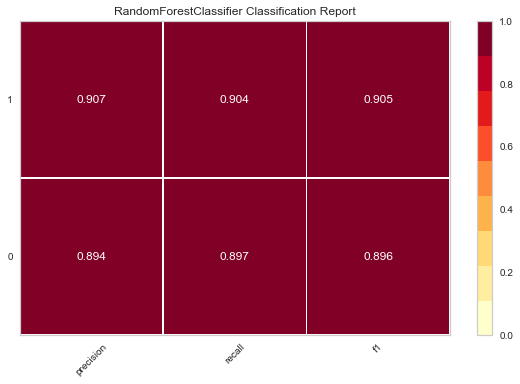

In [22]:
# %matplotlib notebook
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(RandomForestClassifier())
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.finalize()
viz.show(outpath="Images/randomforest_classificationreport.png")

<AxesSubplot:title={'center':'Feature Importances of 18 Features using RandomForestClassifier'}, xlabel='relative importance'>

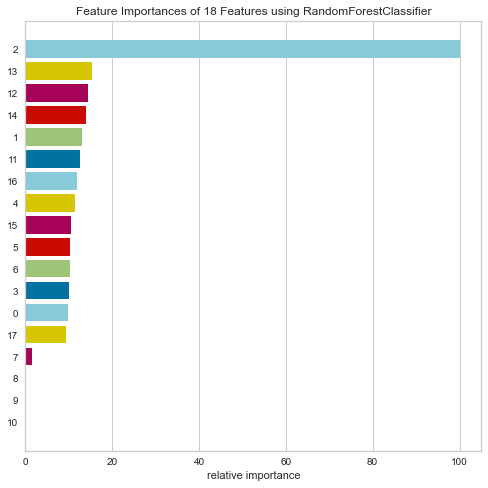

In [23]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.style import set_palette
from yellowbrick.features import RadViz
set_palette('yellowbrick')
viz = FeatureImportances(rf, size=(500, 500))
viz.fit(X_train_scaled, y_train)
viz.show(outpath="Images/featureimportance.png")

In [25]:
import joblib
filename = 'Model/randomForest.sav'
joblib.dump(rf, filename)

['Model/randomForest.sav']